In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random


In [0]:
np.random.seed(0)


In [42]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


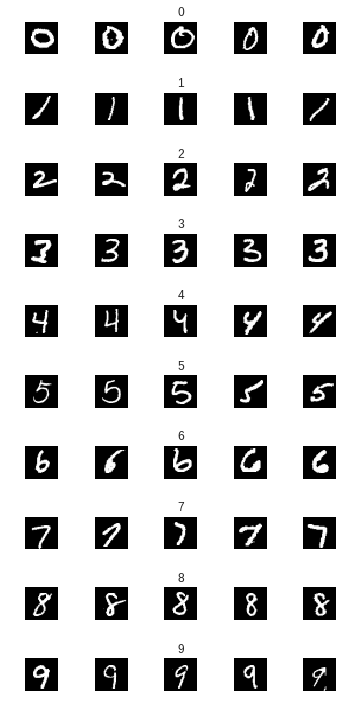

In [43]:
num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


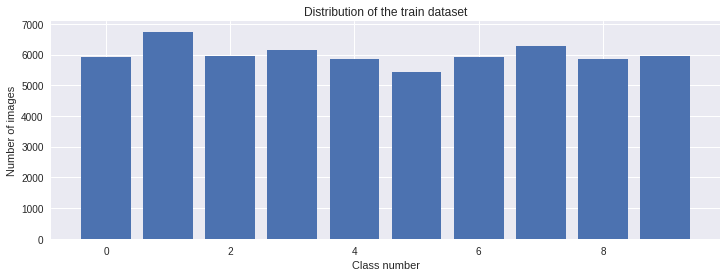

In [44]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
#define the leNet_model method
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5),
                   input_shape=(28, 28, 1),
                  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), 
               loss='categorical_crossentropy',
               metrics=['accuracy'])
  return model

In [49]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 500)               188000    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5010      
Total para

In [50]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_split=0.1, 
                    batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 46us/step - loss: 0.1959 - acc: 0.9375 - val_loss: 0.0473 - val_acc: 0.9855
Epoch 2/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0486 - acc: 0.9849 - val_loss: 0.0467 - val_acc: 0.9865
Epoch 3/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0352 - acc: 0.9883 - val_loss: 0.0357 - val_acc: 0.9878
Epoch 4/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0271 - acc: 0.9914 - val_loss: 0.0456 - val_acc: 0.9867
Epoch 5/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0259 - acc: 0.9916 - val_loss: 0.0498 - val_acc: 0.9860
Epoch 6/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0237 - acc: 0.9925 - val_loss: 0.0544 - val_acc: 0.9870
Epoch 7/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0203 - acc: 0.9937 - val_loss: 0.0421 - val_acc:

Text(0.5, 0, 'epoch')

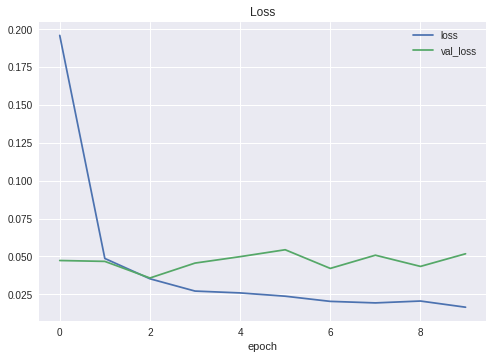

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

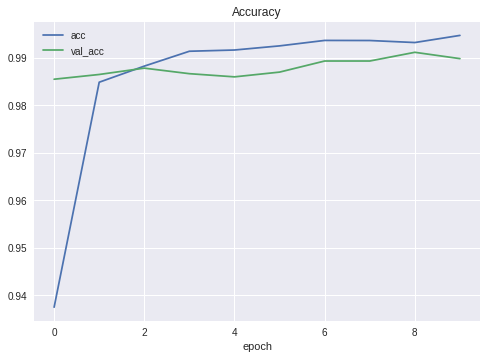

In [52]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

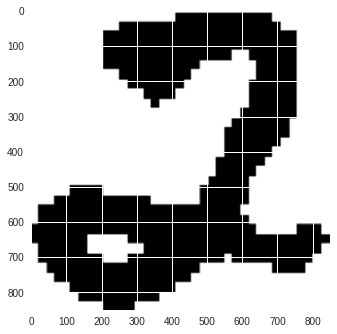

In [57]:
import requests
from PIL import Image

#url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0 118 255 255 255 255
  255 255 255 255 222   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255   2   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 254 254
  254   0 236 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0  33 255 255 255 255 255 255 255  33   0   0
    0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0  21 255 255 255 255 255  21   0   0   0
    0   0 215 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  63 255 255 137   0   0   0   0
    0   0 235 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   

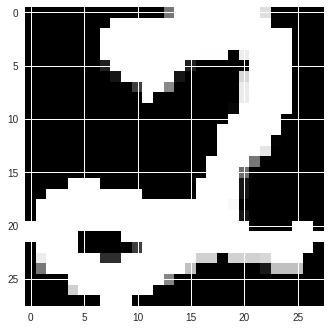

In [58]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28 ))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) #(28, 28)
image = cv2.bitwise_not(gray_scale)

plt.imshow(image, cmap=plt.get_cmap('gray'))
print(image)

In [0]:
image = image / 255
image = image.reshape(1, 28, 28, 1)

In [60]:
prediction = model.predict_classes(image)
print("predicted digit:", str(prediction))

predicted digit: [2]
